In [1]:
from openpiv import tools, pyprocess, validation, filters, scaling 
import numpy as np
import matplotlib.pyplot as plt
import skimage as sk

folder = '/home/matteo/PIV/PIV'
nMedianIter = 5

In [2]:
# Generate strings for the images
numbers = ["{0:03}".format(i) for i in range(1,101)]

In [3]:
# Load saveVectorField functiopon
%run -i '/home/matteo/PIV/PIV/Scripts/flash_mask.py'

In [4]:
# Initialize average field. Number contains the number of images averaged to get that value
frame = tools.imread( folder + '/Images/A' + '001' + 'a.tif' )
average_a = np.zeros_like(frame)
number_a = np.zeros_like(frame)
average_b = np.zeros_like(frame)
number_b = np.zeros_like(frame)
for i in numbers:
    print('Processing image' + i)
    # Read image
    frame_a = tools.imread( folder + '/Images/A' + str(i) + 'a.tif' )
    mask, _ = flash_mask(frame_a)
    # Filter the image 
    selem = sk.morphology.disk(5)
    for n in range(0,1):
        frame_a = sk.filters.median(frame_a,selem)
    
    # Sum the non flashed pixels
    average_a[mask==0] += frame_a[mask==0]
    # Store the number of pixels summed
    number_a += mask==0
    
    # Same for frame b
    frame_b = tools.imread( folder + '/Images/A' + str(i) + 'b.tif' )
    mask, _ = flash_mask(frame_b)
    for n in range(0,nMedianIter):
        frame_b = sk.filters.median(frame_b,selem)
    
    # Sum the non flashed pixels
    average_b[mask==0] += frame_b[mask==0]
    # Store the number of pixels summed
    number_b += mask==0
    
# Divide each pixel for the number included in the sum
average_a = average_a/number_a
average_b = average_b/number_b


Processing image001
Processing image002
Processing image003
Processing image004
Processing image005
Processing image006
Processing image007
Processing image008
Processing image009
Processing image010
Processing image011
Processing image012
Processing image013
Processing image014
Processing image015
Processing image016
Processing image017
Processing image018
Processing image019
Processing image020
Processing image021
Processing image022
Processing image023
Processing image024
Processing image025
Processing image026
Processing image027
Processing image028
Processing image029
Processing image030
Processing image031
Processing image032
Processing image033
Processing image034
Processing image035
Processing image036
Processing image037
Processing image038
Processing image039
Processing image040
Processing image041
Processing image042
Processing image043
Processing image044
Processing image045
Processing image046
Processing image047
Processing image048
Processing image049
Processing image050


(array([109859., 103256., 100850.,  99402.,  97264., 101154., 100102.,
        100520., 103842.,  79719.]),
 array([0.        , 0.26185567, 0.52371134, 0.78556701, 1.04742268,
        1.30927835, 1.57113402, 1.83298969, 2.09484536, 2.35670103,
        2.6185567 ]),
 <a list of 10 Patch objects>)

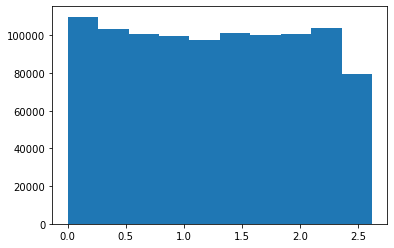

In [5]:
hist = np.histogram(average_a.flatten())
plt.hist(average_a.flatten())

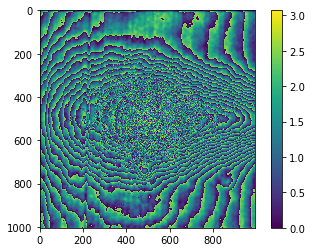

In [6]:
# Save average images
plt.imshow(average_a)
plt.imsave(folder+'/Images/average_a.tiff',average_a, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)
plt.imshow(average_b)
plt.imsave(folder+'/Images/average_b.tiff',average_b, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)

plt.imshow(average_b)
plt.colorbar()
plt.imsave(folder + 'image', average_b, format='tiff',cmap=plt.cm.coolwarm, vmin=0, vmax=3)

# Save numpy arrays
np.save(folder+'/Images/ImagesMinusAverage/average_a',average_a)
np.save(folder+'/Images/ImagesMinusAverage/average_b',average_b)
np.save(folder+'/Images/ImagesMinusAverage/number_a',number_a)
np.save(folder+'/Images/ImagesMinusAverage/number_b',number_b)



In [7]:
# Save images minus average
for i in numbers:
    frame_a = tools.imread( folder + '/Images/A' + str(i) + 'a.tif' )
    frame_a = frame_a - average_a
    frame_a[frame_a<0] = 0
    frame_b = tools.imread( folder + '/Images/A' + str(i) + 'b.tif' )
    frame_b = frame_b - average_b
    frame_b[frame_b<0] = 0
    plt.imsave(folder + '/Images/ImagesMinusAverage/A' + str(i) + 'a.tif',frame_a, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)
    plt.imsave(folder + '/Images/ImagesMinusAverage/A' + str(i) + 'b.tif',frame_b, format='tiff',cmap=plt.cm.gray, vmin=0, vmax=255)
    np.save(folder+'/Images/ImagesMinusAverage/A' + str(i) + 'a', frame_a)
    np.save(folder+'/Images/ImagesMinusAverage/A' + str(i) + 'b', frame_b)